
AUDIO FILE SUMMARY
------------------
Sample Rate        : 48000 Hz
Duration           : 60.00 seconds
Average Loudness   : 0.2636
Tempo              : 110.3 BPM
Average Pitch      : 1154.86 Hz
Zero Crossing Rate : 0.0325
Spectral Centroid  : 1352.54 Hz
Spectral Bandwidth : 1903.00 Hz
Silence Ratio      : 0.0 %

INTERPRETATION
--------------
• Loudness        : High
• Pitch Nature    : Melodic
• Rhythm Strength : Strong
• Texture         : Warm / Dark



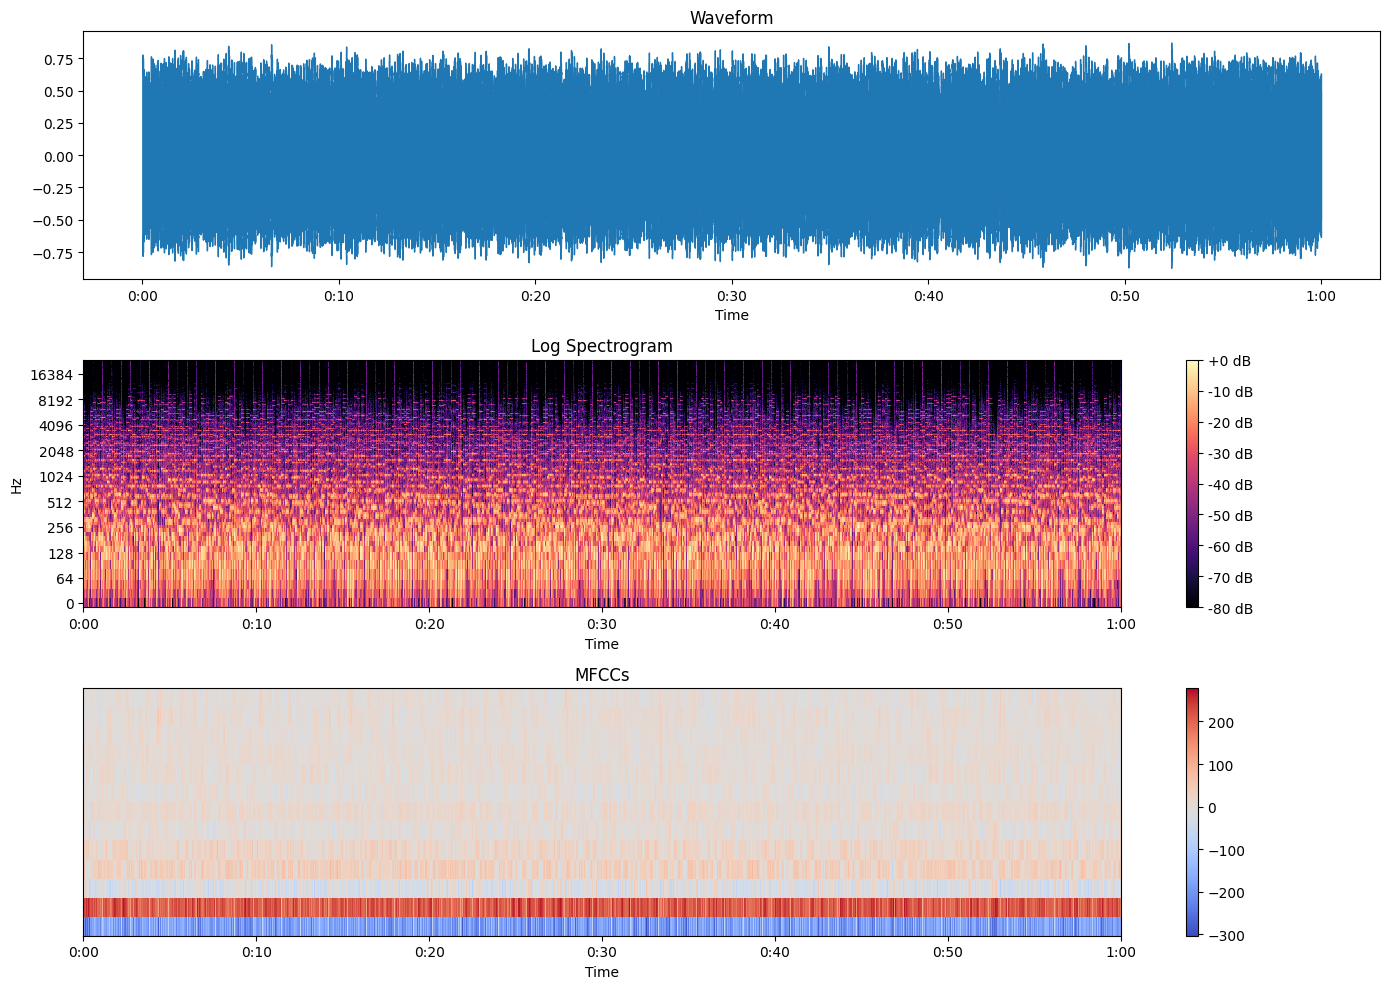

In [14]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


def analyze_wav(file_path, show_plots=True):
    # -----------------------------
    # Load audio
    # -----------------------------
    y, sr = librosa.load(file_path, sr=None, mono=True)

    duration = float(librosa.get_duration(y=y, sr=sr))
    rms = float(np.mean(librosa.feature.rms(y=y)))
    zcr = float(np.mean(librosa.feature.zero_crossing_rate(y)))
    spectral_centroid = float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
    spectral_bandwidth = float(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))

    # Pitch estimation
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[magnitudes > np.median(magnitudes)]
    avg_pitch = float(np.mean(pitch_values)) if len(pitch_values) > 0 else 0.0

    # ✅ FIX: tempo can be ndarray
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(np.mean(tempo))  # <-- THIS FIXES YOUR ERROR

    # Silence estimation
    intervals = librosa.effects.split(y, top_db=30)
    active_duration = sum((end - start) for start, end in intervals) / sr
    silence_ratio = float(1 - (active_duration / duration))

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # -----------------------------
    # TEXT SUMMARY
    # -----------------------------
    summary = f"""
AUDIO FILE SUMMARY
------------------
Sample Rate        : {sr} Hz
Duration           : {duration:.2f} seconds
Average Loudness   : {rms:.4f}
Tempo              : {tempo:.1f} BPM
Average Pitch      : {avg_pitch:.2f} Hz
Zero Crossing Rate : {zcr:.4f}
Spectral Centroid  : {spectral_centroid:.2f} Hz
Spectral Bandwidth : {spectral_bandwidth:.2f} Hz
Silence Ratio      : {silence_ratio*100:.1f} %

INTERPRETATION
--------------
• Loudness        : {"High" if rms > 0.05 else "Moderate" if rms > 0.02 else "Soft"}
• Pitch Nature    : {"Melodic" if avg_pitch > 120 else "Low / Ambient"}
• Rhythm Strength : {"Strong" if tempo > 90 else "Slow / Free-form"}
• Texture         : {"Bright" if spectral_centroid > 2500 else "Warm / Dark"}
"""

    print(summary)

    # -----------------------------
    # VISUALIZATION
    # -----------------------------
    if show_plots:
        plt.figure(figsize=(14, 10))

        # Waveform
        plt.subplot(3, 1, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title("Waveform")

        # Spectrogram
        plt.subplot(3, 1, 2)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Log Spectrogram")

        # MFCCs
        plt.subplot(3, 1, 3)
        librosa.display.specshow(mfccs, sr=sr, x_axis="time")
        plt.colorbar()
        plt.title("MFCCs")

        plt.tight_layout()
        plt.show()


# =========================
# USAGE
# =========================
analyze_wav("music_passionate_60s_20251220_080758.wav")
